# Exploratory Data Analysis

In [ ]:
# Import libraries
from deep_translator import GoogleTranslator
import os
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude
from wordcloud import WordCloud, ImageColorGenerator
import seaborn as sns

In [ ]:
# Translate French comments to English
# https://luis-alberto-g-efe.medium.com/translation-in-python-the-sustainable-way-using-deep-translator-library-b8dab9be25cf
def translate(x):
    y=''
    time.sleep(0.1)
    try:
        v=GoogleTranslator(source='auto', target='en').translate(x)
        return v
    except:
        return y 

In [ ]:
maindf['Review Text Translated'] = maindf['Review Text'].apply(lambda x: translate(x))

In [ ]:
# Save data
maindf.to_csv('preprocessed_data.csv')

In [70]:
# Load data 
df = pd.read_csv('preprocessed_data.csv')
print(len(df))

# Set up colors and labels for plots
labels = ['Eaux Vives', 'Plainpalais', 'Saint Laurent', 'Nyon']
bar_color = ['#EE851C', '#FFDD42', '#A8E008', '#EA0802']
color_list = ['#EE851C', '#A8E008', '#EA0802', '#FFDD42', '#792B1C', '#EE851C', '#A8E008']

1865


# Number of Reviews

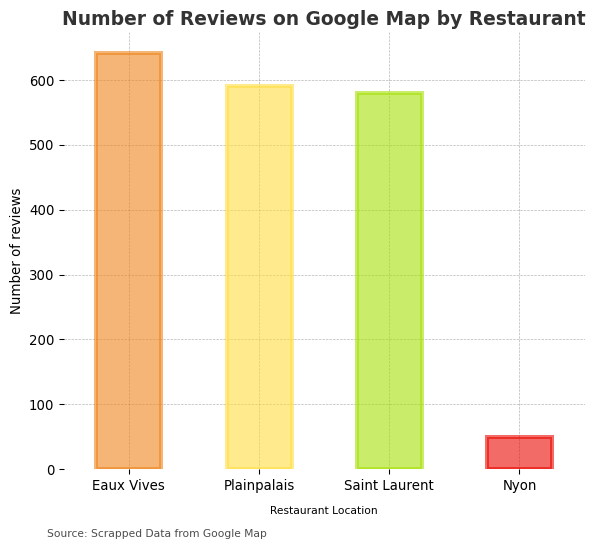

In [63]:
# 1. Generate bar plot - Number of reviews per location 
fig, ax = plt.subplots(figsize=(7,7), dpi = 96)
df.groupby('Location')['Review Text Translated'].count().sort_values(ascending=False).plot(kind='bar', width=0.5, color=bar_color, edgecolor=bar_color, alpha=0.6, linewidth=3, ax=ax)

# Customize bar plot 
ax.set_axisbelow(True)
ax.grid(which='major', axis='both', ls='--', lw=.5, c='k', alpha=.3)
ax.set_xlabel('Restaurant Location', fontsize=8, labelpad=10)
ax.set_ylabel('Number of reviews')
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=0)

# Remove the spines and make the right one thicker
ax.spines[['top','left','bottom', 'right']].set_visible(False)

# Add in title and source 
ax.set_title("Number of Reviews on Google Map by Restaurant", fontsize=14, weight='bold', alpha=.8)
ax.text(x=0.1, y=0.10, s="Source: Scrapped Data from Google Map", transform=fig.transFigure, ha='left', fontsize=8, alpha=.7)

# Adjust layout
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.85, wspace=None, hspace=None)


# Save and display the bar plot
plt.savefig('review_num.png')
plt.show()


# Review Length

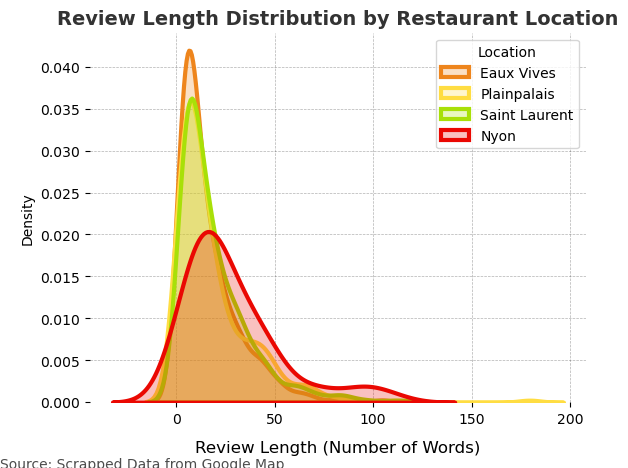

In [66]:
# Generate KDE plot - Review length distribution per location 
# Calculate the review length by counting words 
df['review_length'] = df['Review Text Translated'].str.count(' ') + 1
df.head()

# Create KDE plot for each location 
for i, location in enumerate(labels): 
    subset = df[(df['Location'] == location) & (df['review_length'] > 0)]
    ax = sns.kdeplot(subset['review_length'], fill=True, label = location, color=bar_color[i], linewidth = 3)

# Customize KDE plot
ax.set_axisbelow(True)
ax.grid(which='major', axis='both', linestyle='--', linewidth=0.5, color='k', alpha=0.3)
ax.set_xlabel('Review Length (Number of Words)', fontsize=12, labelpad=10)
ax.set_ylabel('Density')
ax.legend(title='Location')

# Remove spines
for spine in ['top', 'left', 'bottom', 'right']:
    ax.spines[spine].set_visible(False)

# Add title and source
ax.set_title("Review Length Distribution by Restaurant Location",fontsize=14, weight='bold', alpha=0.8)
ax.text(x=0, y=0, s="Source: Scrapped Data from Google Map", transform=fig.transFigure, ha='left', fontsize=10, alpha=0.7)

# Save and display the KDE plot
plt.savefig('review_length_distribution.png')
plt.show()

# Word Cloud

c:\Users\Wenxia\anaconda3\lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


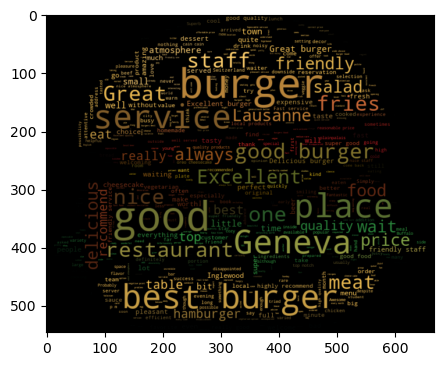

In [68]:
# Load text data
text = open('translated_text.txt', encoding='utf-8').read()

# Load and downsample the mask image for faster processig
burger_color = np.array(Image.open('burger.png').convert("RGB"))
burger_color = burger_color[::3, ::3]

# Create mask by setting non-colored areas to white
burger_mask = burger_color.copy()
burger_mask[burger_mask.sum(axis=2)==0]=255

# Enhance mask edges for a more defined shape
edges = np.mean([gaussian_gradient_magnitude(burger_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
burger_mask[edges > .08] = 255 

wc = WordCloud(max_words=1000, mask=burger_mask, max_font_size=70, random_state=42, relative_scaling=0, width=1000, height=1000)

# Generate word cloud
wc.generate(text)

image_colors = ImageColorGenerator(burger_color)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(5, 5))
plt.imshow(wc, interpolation="bilinear")